# Modelling
This notebook is about creating models to predict restaurants' ratings based on information from business and reviews. The target is whether the rating is greater than or equal to 4. For the reviews, we tried PCs from 1000 words tfidf and tfidfs from 100 words without PCA. Logistic Regression and Gradient Boosting were built, and they achieved similar performances, with AUC around .90.

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Read features
infile_name = 'joined_features11-final.csv'
df = pd.read_csv(infile_name)

In [3]:
infile_name = 'reviews_tfidf_pcs.csv'
df2 = pd.read_csv(infile_name)

In [184]:
df3.columns

Index(['stars', 'city', 'review_count', 'is_open', 'RestaurantsReservations',
       'RestaurantsGoodForGroups', 'BikeParking', 'OutdoorSeating',
       'RestaurantsTakeOut', 'BusinessAcceptsCreditCards',
       'RestaurantsPriceRange2', 'GoodForKids', 'RestaurantsDelivery',
       'RestaurantsAttire', 'Unnamed: 0', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29'],
      dtype='object')

In [12]:
df = df.drop(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29'], axis=1)

In [17]:
df3 = df.set_index('business_id').join(df2.set_index('business_id'))

In [33]:
for i in df['business_id']:
    if i[0] == '-':
        print(i)

-9YyInW1wapzdNZrhQJ9dg
-46pFijv3f2jZH-_Ze6CQA
-8ZiMXZReeTD3kwEvS0Lww
-153AjTW5luZPK4omEujWA
-1m9o3vGRA8IBPNvNqKLmA
-C8sSrFqaCxp51pyo-fQLQ


In [34]:
for i in df2['business_id']:
    if i[0] == '-':
        print(i)

-153AjTW5luZPK4omEujWA
-1m9o3vGRA8IBPNvNqKLmA
-46pFijv3f2jZH-_Ze6CQA
-8ZiMXZReeTD3kwEvS0Lww
-9YyInW1wapzdNZrhQJ9dg
-AGdGGCeTS-njB_8GkUmjQ
-BAOJ8aA5MCrYx_tQUyZHg
-BmqghX1sv7sgsxOIS2yAg
-Bv-HHUs8aHzDrdWcZHn8w
-C8sSrFqaCxp51pyo-fQLQ
-CbDQXiuKzPQ0_jiUz03aw
-EohS3nXZGl6odE9Lx5BSw
-INdswGdyRyy72xXHalNbg
-Jx2rd2rH7MlWfb9RMtCFQ
-LMycE26AortJDsbc8oXOg
-MmAW2x9vMGuhVcALU7QRw
-Qamd1hK7jczDkdUrm8lxg
-R_u_4Ya8ceUN7qDlvIQTg
-SGZcGqnsp_uRIjKP2RGZg
-Sgt6wFx05Ox-O1ZSC3LOA
-Uix-n4Jqo4W7ERagC5qAA
-VYYKJBVTX1BtaJU4eFJ8A
-YBC5pR2eW0C2sPygH25MA
-a43zqioXNOjx_QejRS9FA
-cxD1NimFldATDUsN-oa3A
-d0Ou1JmEK2j5HR4PGMahA
-kFyzXRzOlyoL4NyzoVkMA
-n1g9MdeG46v1-gzZ4ldvQ
-n8PaipyFGNUJE4xlnrOAg
-pN44P-_PjRpcj4Rk2wMOg
-qdhAN_Ep0kv0EMB2QEAjg
-siWsjw2AL9lcx6gy-NxeA
-sjCxkxv6xU5rEVLFybAuA
-wwluPVyqIxtFLUAjpvN1A
-xbQQR_ydEJGqYzHSF4DnQ


In [35]:
infile_name = 'joined_features_May_15.csv'
df4 = pd.read_csv(infile_name)

In [115]:
df7 = df7.insert(115, 'Stars_over_4', True, allow_duplicates = False)

In [112]:
for each in range(0,len(df7)):
    if df7.loc[each]['stars'] >= 4:
        df7.loc[each]['Stars_over_4'] = True
    else:
        df7.loc[each]['Stars_over_4'] = False

TypeError: object of type 'NoneType' has no len()

In [42]:
df4 = df4.drop(['Unnamed: 0'], axis=1)

In [43]:
df4.columns

Index(['business_id', 'stars', 'city', 'review_count', 'is_open',
       'RestaurantsReservations', 'RestaurantsGoodForGroups', 'BikeParking',
       'OutdoorSeating', 'RestaurantsTakeOut', 'BusinessAcceptsCreditCards',
       'RestaurantsPriceRange2', 'GoodForKids', 'RestaurantsDelivery',
       'RestaurantsAttire', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29'],
      dtype='object')

In [69]:
X = df4[['review_count','RestaurantsReservations','RestaurantsGoodForGroups','BikeParking','OutdoorSeating','RestaurantsTakeOut','BusinessAcceptsCreditCards','RestaurantsPriceRange2','GoodForKids','RestaurantsDelivery','0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29']]

# First, we create a binary target by thresholding at the median of our AdjSalePrice in $100,000
y_c = df4[['Stars_over_4']]

In [48]:
df4.head()

,business_id,stars,city,review_count,is_open,RestaurantsReservations,RestaurantsGoodForGroups,BikeParking,OutdoorSeating,RestaurantsTakeOut,...,20,21,22,23,24,25,26,27,28,29
0,tstimHoMcYbkSC4eBA1wEg,4.5,Las Vegas,184,1,False,True,True,False,True,...,-0.009527,0.016761,-0.004897,-0.050150,0.008960,0.001960,-0.017487,0.010661,0.080302,-0.004242
1,sKhDrZFCJqfRNylkHrIDsQ,4.0,Las Vegas,76,1,False,False,True,True,True,...,0.007776,-0.015534,0.015925,-0.015689,-0.001887,-0.029827,0.029871,0.000571,0.005806,-0.005119
2,4n81G-pmC3rfhmaPsbwYKg,4.5,Las Vegas,3,1,False,False,False,False,False,...,0.005651,-0.049143,-0.016001,-0.020025,-0.025674,0.045779,-0.018966,0.024848,-0.018843,0.000362
3,eY98EH_PHGnJVaJ7t2UpoQ,4.0,Las Vegas,77,0,False,True,False,False,True,...,0.004350,-0.038417,0.001243,-0.019342,0.009444,0.045440,0.029636,-0.034272,0.001435,0.010709
4,iA9xu-6oOFynZQxO5qrauQ,3.0,Henderson,3,1,False,False,False,False,False,...,-0.032981,-0.001951,-0.020635,-0.050814,0.054420,-0.070147,0.001419,0.031584,0.018742,0.015563


In [70]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_c, test_size=0.2, random_state=83)

logr = LogisticRegression().fit(X_train_c,y_train_c)

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
from sklearn.model_selection import GridSearchCV
params = {'penalty':['l1','l2'], 'fit_intercept':['True','False'],'max_iter':[100,1000],
         'intercept_scaling':[1,2,3,4,5]}

gs = GridSearchCV(LogisticRegression(),params, cv=5).fit(X_train_c,y_train_c)

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

In [ ]:
## Results for Logistic Regression

In [72]:
gs.best_params_

{'fit_intercept': 'True',
 'intercept_scaling': 1,
 'max_iter': 100,
 'penalty': 'l1'}

In [79]:
gs.best_score_


0.8478260869565217

In [87]:
trainset_acc = gs.best_estimator_.score(X_test_c,y_test_c)
print('logr training set accuracy: {:.3f}'.format(trainset_acc))

logr training set accuracy: 0.799


In [86]:
gs.best_score_

0.8478260869565217

In [254]:
gs.best_estimator_.coef_

array([[ 9.22202525e-04, -6.23572753e-02, -1.40938857e-01,
         1.75337274e-01,  0.00000000e+00, -2.76504094e-01,
         2.88647957e-02, -2.48792159e-01, -3.19646349e-01,
         2.88804519e-01, -1.80180607e+00, -1.67470816e+01,
        -1.91824576e+00, -1.78867135e+01,  1.00614114e+01,
         2.24339949e+00, -1.52428822e+01, -3.72375538e+00,
        -7.93355738e+00,  1.53170041e+01,  1.09445261e+01,
        -6.63796214e-02, -5.42983738e+00,  0.00000000e+00,
         0.00000000e+00,  3.91141821e+00,  9.10172882e+00,
         0.00000000e+00,  1.35437847e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         6.21514728e+00, -6.22258650e-01,  0.00000000e+00,
         3.04510634e+00,  0.00000000e+00,  1.20605968e+00,
         0.00000000e+00]])

In [304]:
y_score_c = gs.predict_proba(X_test_c)[:,1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test_c, y_score_c)
    roc_auc[i] = auc(fpr[i], tpr[i])

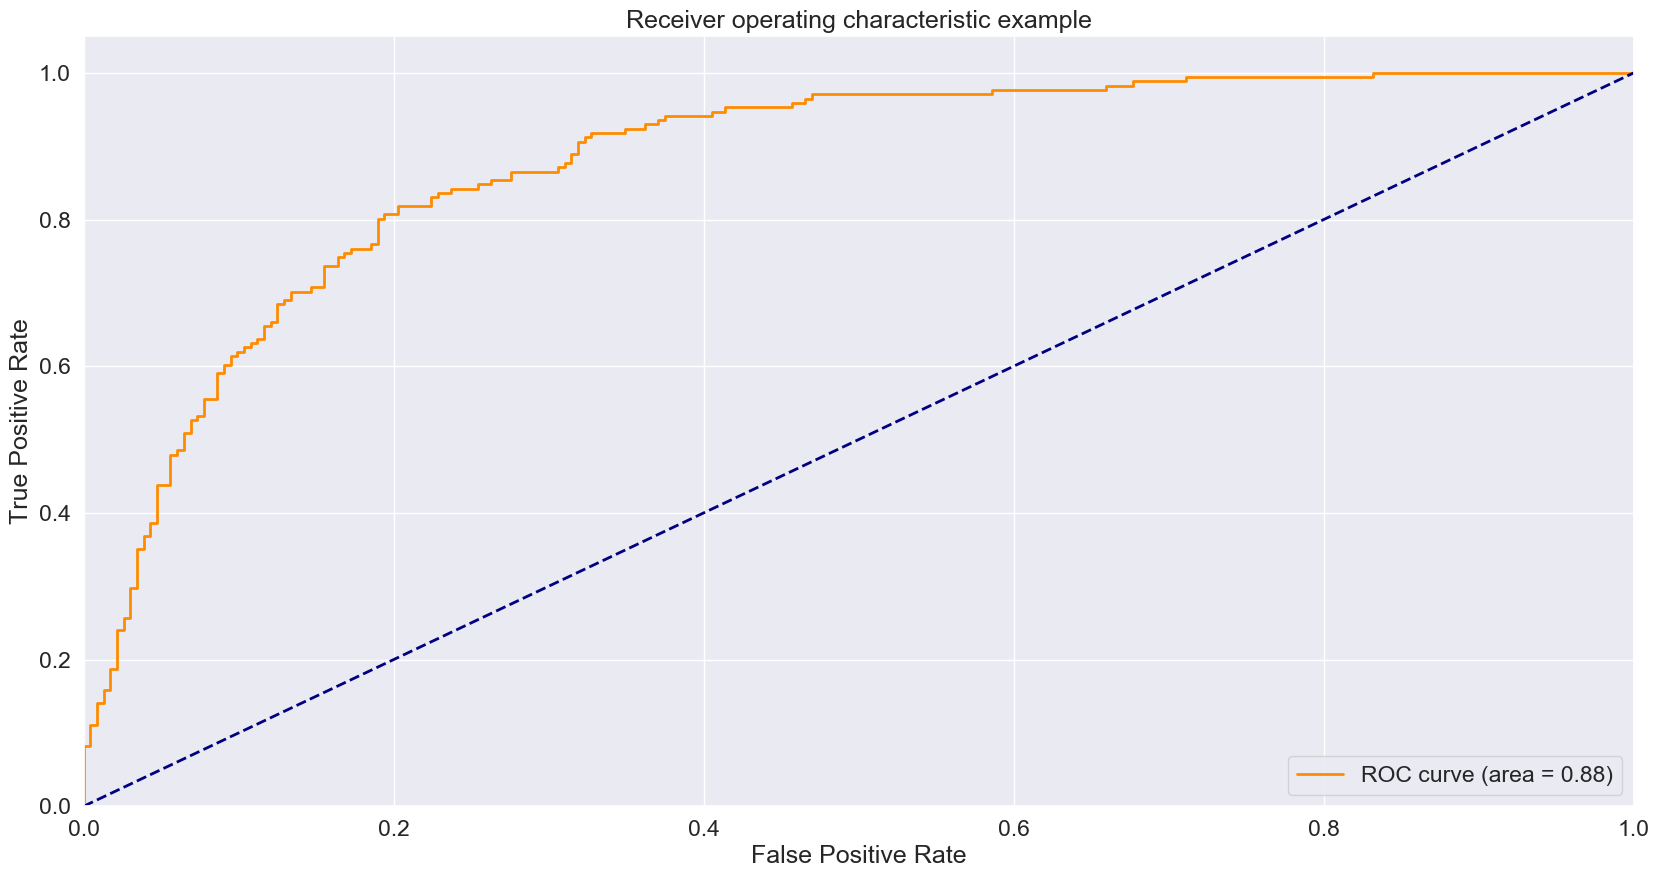

In [305]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [89]:
(df4['stars']>=4).mean()

0.41828117237953305

In [91]:
GBC = GradientBoostingClassifier().fit(X_train_c,y_train_c)

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
GBC.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

In [95]:
paramsgb = {'learning_rate': [0.1,0.01],
             'max_depth': [3,5,7],
             'max_features': [10,20,30],
 #            'min_samples_split': 2,
             'n_estimators': [100,1000]}
gsgb = GridSearchCV(GradientBoostingClassifier(),paramsgb, cv=5).fit(X_train_c,y_train_c)

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

In [96]:
gsgb.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'max_features': 10,
 'n_estimators': 1000}

In [ ]:
### Results for Gradient Boosting

In [97]:
gsgb.best_score_

0.831055900621118

In [99]:
trainset_acc = gsgb.best_estimator_.score(X_test_c,y_test_c)
print('GB test set accuracy: {:.3f}'.format(trainset_acc))

GB test set accuracy: 0.809


In [252]:
gsgb.best_estimator_.feature_importances_

array([0.03798785, 0.0003838 , 0.        , 0.00212314, 0.00127598,
       0.00051174, 0.00151343, 0.0097834 , 0.00210983, 0.        ,
       0.04252315, 0.09012275, 0.01492659, 0.09380243, 0.05295246,
       0.01205724, 0.10014707, 0.02071445, 0.03600662, 0.06303739,
       0.05837753, 0.022215  , 0.03409122, 0.01122046, 0.0150042 ,
       0.0277861 , 0.05083082, 0.01442784, 0.02522546, 0.00980069,
       0.00970267, 0.01892046, 0.01040195, 0.03009202, 0.01732664,
       0.00521049, 0.02335984, 0.00778549, 0.0113005 , 0.01494132])

In [302]:
y_score_cb = gsgb.predict_proba(X_test_c)[:,1]
fprb = dict()
tprb = dict()
roc_aucb = dict()
for i in range(2):
    fprb[i], tprb[i], _ = roc_curve(y_test_c, y_score_cb)
    roc_aucb[i] = auc(fprb[i], tprb[i])

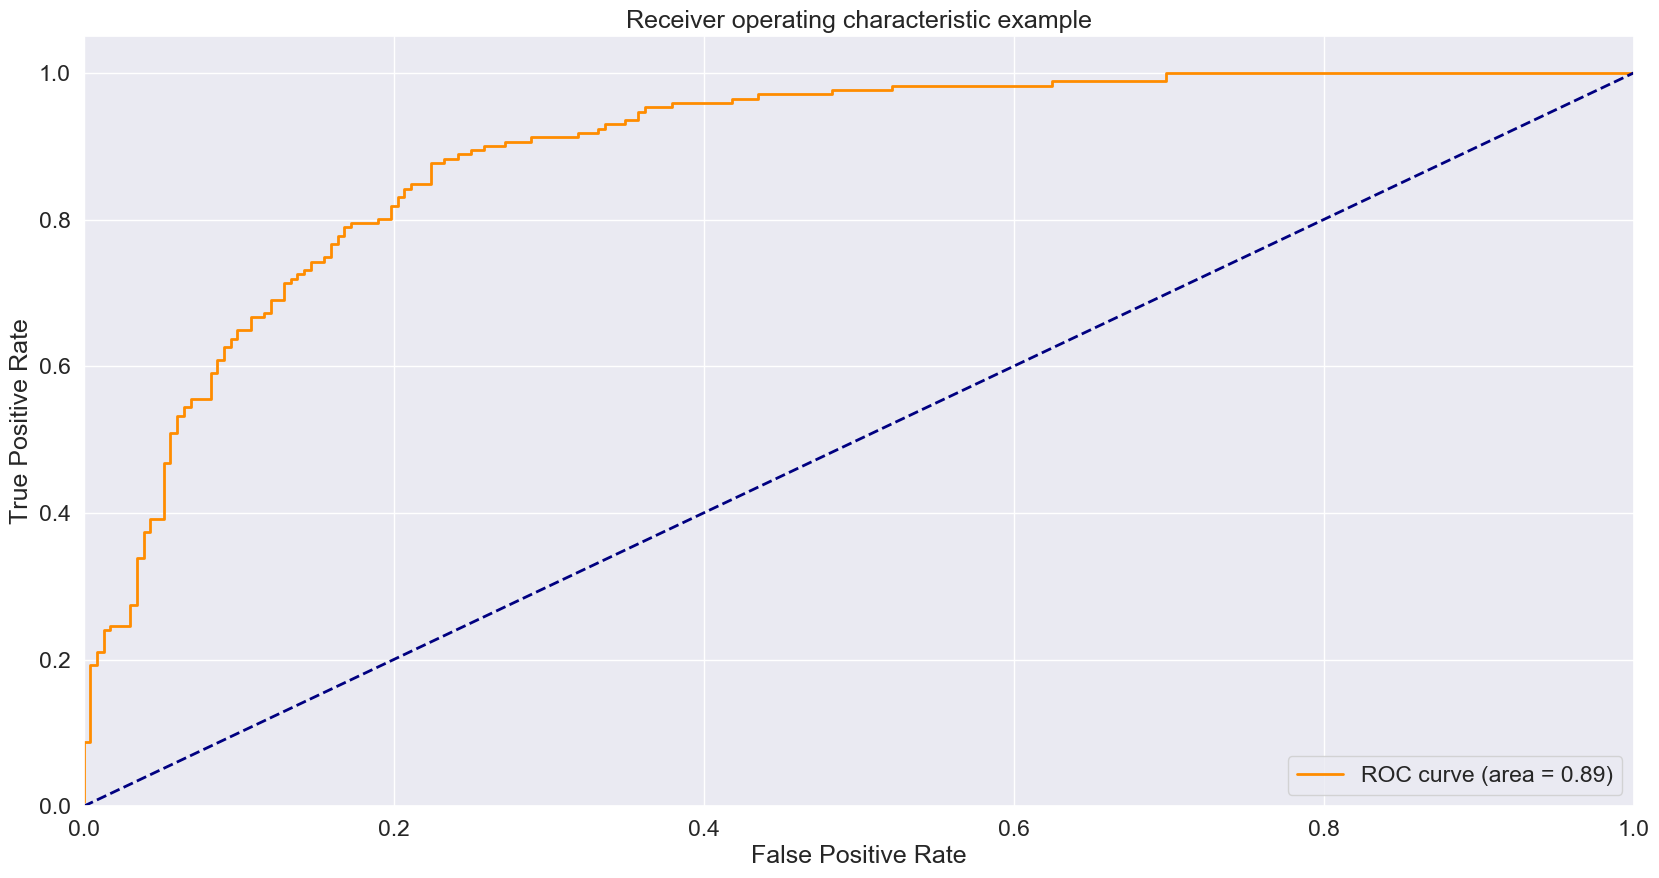

In [303]:
plt.figure()
lw = 2
plt.plot(fprb[1], tprb[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_aucb[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [227]:
infile_name = 'joined_features_words.csv'
df7 = pd.read_csv(infile_name)

In [235]:
df7['Stars_over_4'] = df7['stars']>=4

In [221]:
df7 = df7.insert(115, 'Stars_over_4', True, allow_duplicates = False)

In [237]:
#Xw = df7.iloc[:,2:115]
Xw = df7[['review_count','RestaurantsReservations','RestaurantsGoodForGroups','BikeParking','OutdoorSeating','RestaurantsTakeOut','BusinessAcceptsCreditCards','RestaurantsPriceRange2','GoodForKids','RestaurantsDelivery','about', 'after', 'again', 'also', 'alway', 'amaz', 'anoth', 'around',
       'be', 'becaus', 'befor', 'best', 'better', 'burger', 'busi', 'chees',
       'clean', 'come', 'cook', 'could', 'definit', 'delici', 'dish', 'do',
       'down', 'drink', 'drive', 'enjoy', 'even', 'ever', 'everi', 'everyth',
       'experi', 'first', 'flavor', 'fresh', 'friend', 'from', 'go', 'have',
       'help', 'here', 'know', 'leav', 'littl', 'long', 'manag', 'meal',
       'meat', 'more', 'most', 'much', 'need', 'never', 'next', 'other',
       'over', 'perfect', 'pizza', 'realli', 'restaur', 'salad', 'sandwich',
       'sauc', 'say', 'server', 'sinc', 'some', 'someth', 'staff', 'star',
       'still', 'store', 'super', 'sure', 'tabl', 'taco', 'tast', 'than',
       'that', 'their', 'them', 'then', 'there', 'they', 'this', 'time', 'tri',
       'vega', 'veri', 'walk', 'well', 'what', 'when', 'which', 'while',
       'will', 'with', 'would', 'your']]

# First, we create a binary target by thresholding at the median of our AdjSalePrice in $100,000
y_cw = df7[['Stars_over_4']]

In [202]:
df7.columns[15:115]

Index(['about', 'after', 'again', 'also', 'alway', 'amaz', 'anoth', 'around',
       'be', 'becaus', 'befor', 'best', 'better', 'burger', 'busi', 'chees',
       'clean', 'come', 'cook', 'could', 'definit', 'delici', 'dish', 'do',
       'down', 'drink', 'drive', 'enjoy', 'even', 'ever', 'everi', 'everyth',
       'experi', 'first', 'flavor', 'fresh', 'friend', 'from', 'go', 'have',
       'help', 'here', 'know', 'leav', 'littl', 'long', 'manag', 'meal',
       'meat', 'more', 'most', 'much', 'need', 'never', 'next', 'other',
       'over', 'perfect', 'pizza', 'realli', 'restaur', 'salad', 'sandwich',
       'sauc', 'say', 'server', 'sinc', 'some', 'someth', 'staff', 'star',
       'still', 'store', 'super', 'sure', 'tabl', 'taco', 'tast', 'than',
       'that', 'their', 'them', 'then', 'there', 'they', 'this', 'time', 'tri',
       'vega', 'veri', 'walk', 'well', 'what', 'when', 'which', 'while',
       'will', 'with', 'would', 'your'],
      dtype='object')

In [196]:
df7.iloc[[:,2:115]]

SyntaxError: invalid syntax (<ipython-input-196-4302f668212f>, line 1)

In [238]:
X_train_cw, X_test_cw, y_train_cw, y_test_cw = train_test_split(Xw, y_cw, test_size=0.2, random_state=83)

#df.drop(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29'], axis=1)

logr = LogisticRegression().fit(X_train_cw,y_train_cw)

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [239]:
paramsw = {'penalty':['l1','l2'], 'fit_intercept':['True','False'],'max_iter':[100,1000],
         'intercept_scaling':[1,2,3,4,5]}

gsw = GridSearchCV(LogisticRegression(),paramsw, cv=5).fit(X_train_cw,y_train_cw)

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

In [240]:
gsw.best_params_

{'fit_intercept': 'True',
 'intercept_scaling': 1,
 'max_iter': 100,
 'penalty': 'l1'}

In [ ]:
### Results for Logistic Regression using Words

In [241]:
gsw.best_score_

0.8267080745341615

In [242]:
trainset_acc = gsw.best_estimator_.score(X_test_cw,y_test_cw)
print('logr training set accuracy: {:.3f}'.format(trainset_acc))

logr training set accuracy: 0.806


In [298]:
y_score_cw = gsw.predict_proba(X_test_cw)[:,1]
fprw = dict()
tprw = dict()
roc_aucw = dict()
for i in range(2):
    fprw[i], tprw[i], _ = roc_curve(y_test_cw, y_score_cw)
    roc_aucw[i] = auc(fprw[i], tprw[i])

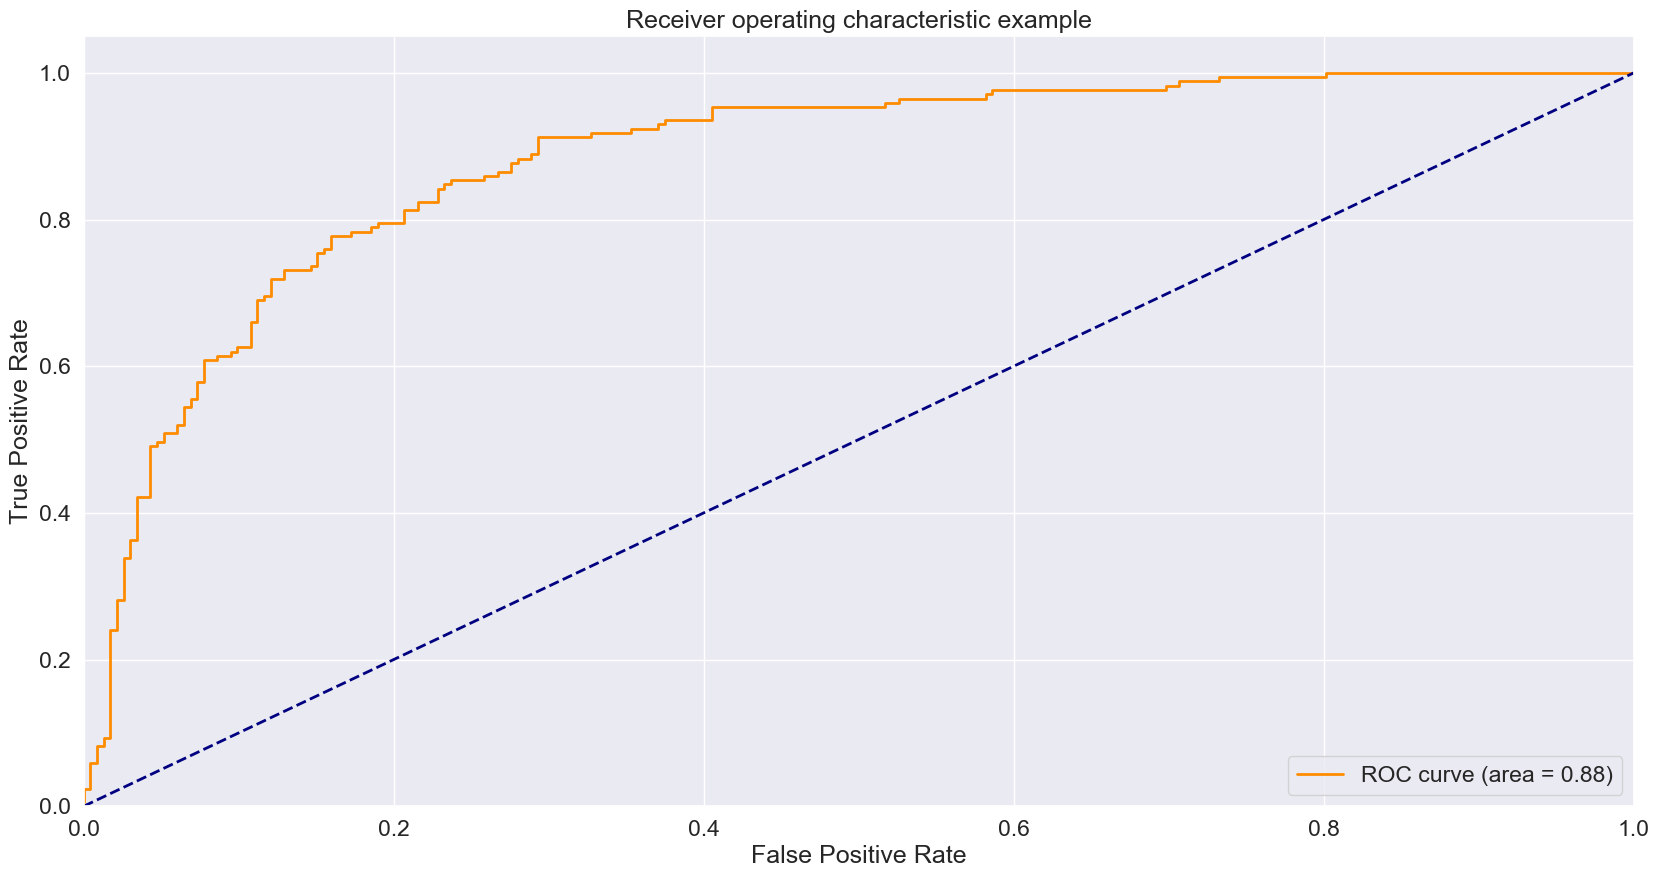

In [299]:
plt.figure()
lw = 2
plt.plot(fprw[1], tprw[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_aucw[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [311]:
dfx1 = []
for i in range(len(objects)):
    dfx1.append((objects[i],performance[i]))

In [355]:
dfx2 = sorted(dfx1, reverse = True)

TypeError: '<' not supported between instances of 'str' and 'float'

In [351]:
objs2 = [elem[0] for elem in dfx2]

In [352]:
perf2 = [elem[1] for elem in dfx2]

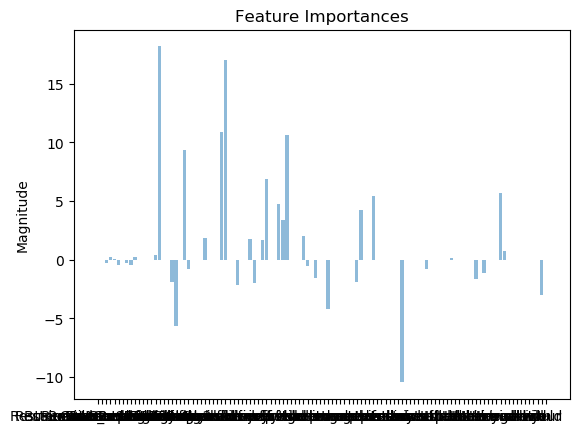

In [356]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

objects = ('review_count','RestaurantsReservations','RestaurantsGoodForGroups','BikeParking','OutdoorSeating','RestaurantsTakeOut','BusinessAcceptsCreditCards','RestaurantsPriceRange2','GoodForKids','RestaurantsDelivery','about', 'after', 'again', 'also', 'alway', 'amaz', 'anoth', 'around',
       'be', 'becaus', 'befor', 'best', 'better', 'burger', 'busi', 'chees',
       'clean', 'come', 'cook', 'could', 'definit', 'delici', 'dish', 'do',
       'down', 'drink', 'drive', 'enjoy', 'even', 'ever', 'everi', 'everyth',
       'experi', 'first', 'flavor', 'fresh', 'friend', 'from', 'go', 'have',
       'help', 'here', 'know', 'leav', 'littl', 'long', 'manag', 'meal',
       'meat', 'more', 'most', 'much', 'need', 'never', 'next', 'other',
       'over', 'perfect', 'pizza', 'realli', 'restaur', 'salad', 'sandwich',
       'sauc', 'say', 'server', 'sinc', 'some', 'someth', 'staff', 'star',
       'still', 'store', 'super', 'sure', 'tabl', 'taco', 'tast', 'than',
       'that', 'their', 'them', 'then', 'there', 'they', 'this', 'time', 'tri',
       'vega', 'veri', 'walk', 'well', 'what', 'when', 'which', 'while',
       'will', 'with', 'would', 'your')
y_pos = np.arange(len(objects))
performance = [ 4.63454833e-04,  0.00000000e+00, -2.73833296e-01,
         2.35556326e-01,  3.15967449e-02, -4.59772511e-01,
         0.00000000e+00, -2.99375683e-01, -4.13042083e-01,
         2.16397707e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  4.39553544e-01,
         1.81706493e+01,  0.00000000e+00,  0.00000000e+00,
        -1.86410647e+00, -5.68105462e+00,  0.00000000e+00,
         9.30111769e+00, -7.61378709e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.81894696e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.08712928e+01,  1.69696875e+01,  0.00000000e+00,
         0.00000000e+00, -2.19489064e+00,  0.00000000e+00,
         0.00000000e+00,  1.77190136e+00, -1.95471769e+00,
         0.00000000e+00,  1.64907103e+00,  6.89237958e+00,
         0.00000000e+00,  0.00000000e+00,  4.73722886e+00,
         3.38908011e+00,  1.05952446e+01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  2.02775843e+00,
        -4.98281026e-01,  0.00000000e+00, -1.51978821e+00,
         0.00000000e+00,  0.00000000e+00, -4.21408821e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.91564644e+00,  4.21213153e+00,  0.00000000e+00,
         0.00000000e+00,  5.41774375e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.04432335e+01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -7.60599307e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.86389966e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.62170944e+00,
        -2.13096950e-02, -1.16965469e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  5.71858463e+00,
         7.39872418e-01,  0.00000000e+00,  6.00534547e-03,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -3.02168936e+00,  0.00000000e+00]



plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Magnitude')
plt.title('Feature Importances')

plt.show()



In [363]:
dfx3 = []
for i in range(len(objects)):
    dfx3.append((objects[i],performance[i]))

In [364]:
dfx3

[('review_count', 0.000463454833),
 ('RestaurantsReservations', 0.0),
 ('RestaurantsGoodForGroups', -0.273833296),
 ('BikeParking', 0.235556326),
 ('OutdoorSeating', 0.0315967449),
 ('RestaurantsTakeOut', -0.459772511),
 ('BusinessAcceptsCreditCards', 0.0),
 ('RestaurantsPriceRange2', -0.299375683),
 ('GoodForKids', -0.413042083),
 ('RestaurantsDelivery', 0.216397707),
 ('about', 0.0),
 ('after', 0.0),
 ('again', 0.0),
 ('also', 0.0),
 ('alway', 0.439553544),
 ('amaz', 18.1706493),
 ('anoth', 0.0),
 ('around', 0.0),
 ('be', -1.86410647),
 ('becaus', -5.68105462),
 ('befor', 0.0),
 ('best', 9.30111769),
 ('better', -0.761378709),
 ('burger', 0.0),
 ('busi', 0.0),
 ('chees', 0.0),
 ('clean', 1.81894696),
 ('come', 0.0),
 ('cook', 0.0),
 ('could', 0.0),
 ('definit', 10.8712928),
 ('delici', 16.9696875),
 ('dish', 0.0),
 ('do', 0.0),
 ('down', -2.19489064),
 ('drink', 0.0),
 ('drive', 0.0),
 ('enjoy', 1.77190136),
 ('even', -1.95471769),
 ('ever', 0.0),
 ('everi', 1.64907103),
 ('everyth',

In [307]:
objects[15]

'amaz'

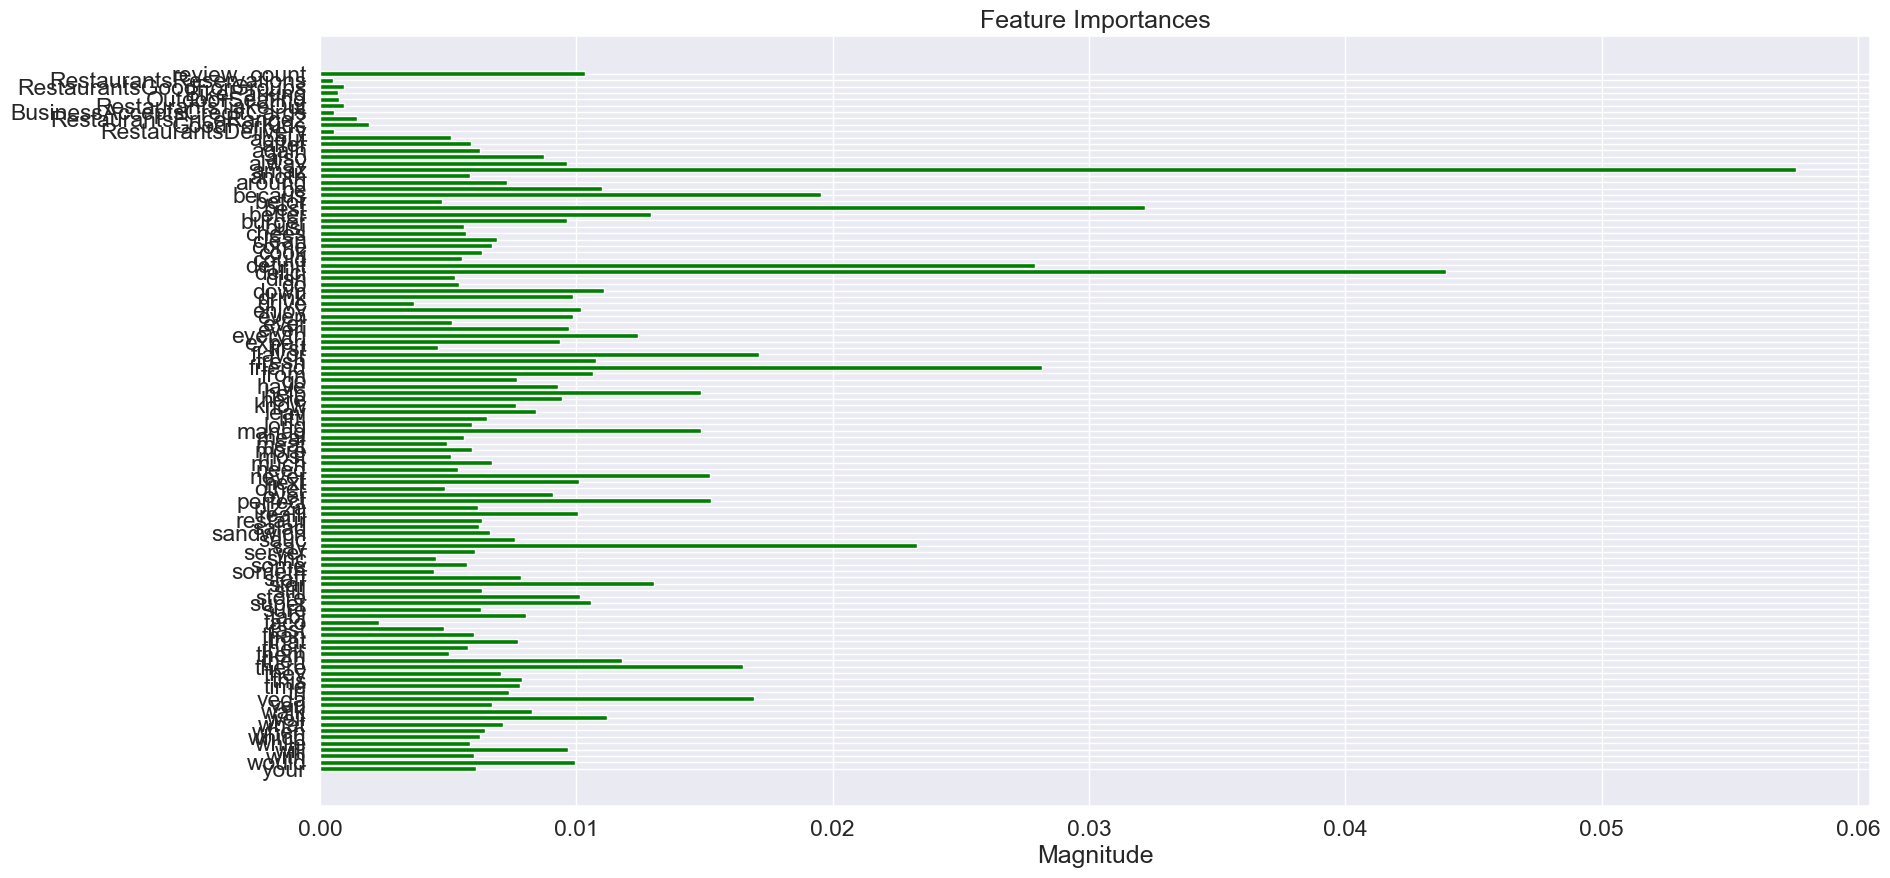

In [287]:
fig, ax = plt.subplots()

ax.barh(y_pos, performance, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(objects)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Magnitude')
ax.set_title('Feature Importances')

plt.show()

In [243]:
GBCw = GradientBoostingClassifier().fit(X_train_cw,y_train_cw)

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [244]:
paramsgbw = {'learning_rate': [0.1,0.01],
             'max_depth': [3,5,7],
             'max_features': [10,20,30],
 #            'min_samples_split': 2,
             'n_estimators': [100,1000]}
gsgbw = GridSearchCV(GradientBoostingClassifier(),paramsgbw, cv=5).fit(X_train_cw,y_train_cw)

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversio

In [245]:
gsgbw.best_params_

{'learning_rate': 0.01,
 'max_depth': 7,
 'max_features': 20,
 'n_estimators': 1000}

In [ ]:
### Results for Gradient Boosting using Words

In [246]:
gsgbw.best_score_

0.8347826086956521

In [247]:
trainset_acc = gsgbw.best_estimator_.score(X_test_cw,y_test_cw)
print('GB test set accuracy: {:.3f}'.format(trainset_acc))

GB test set accuracy: 0.804


In [300]:
y_score_cwb = gsgbw.predict_proba(X_test_cw)[:,1]
fprwb = dict()
tprwb = dict()
roc_aucwb = dict()
for i in range(2):
    fprwb[i], tprwb[i], _ = roc_curve(y_test_cw, y_score_cwb)
    roc_aucwb[i] = auc(fprwb[i], tprwb[i])

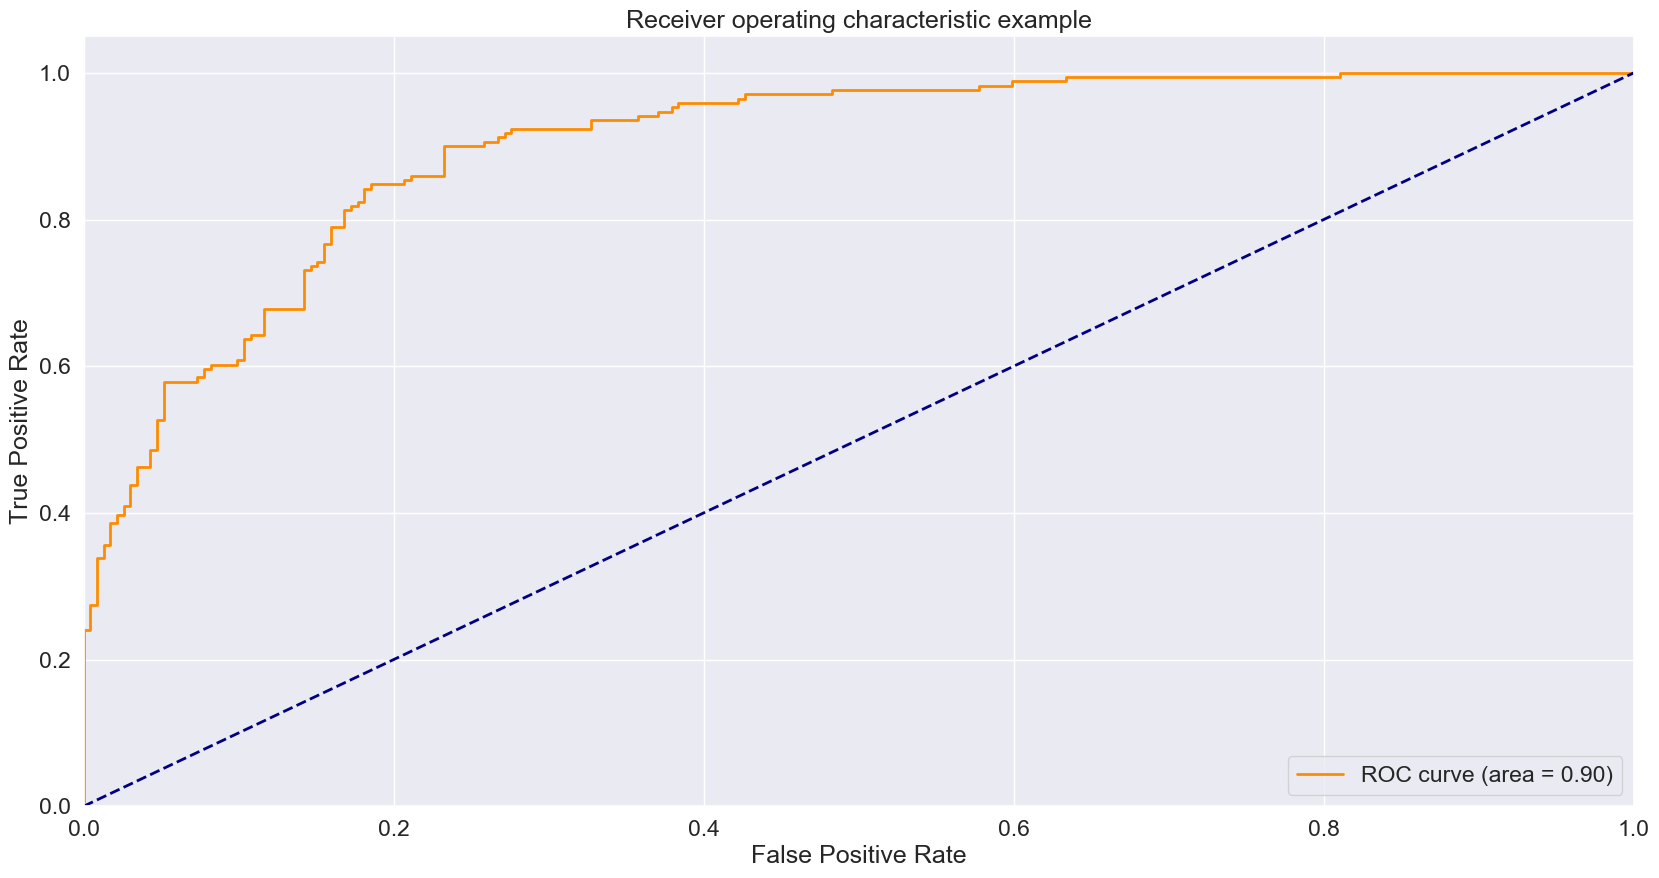

In [301]:
plt.figure()
lw = 2
plt.plot(fprwb[1], tprwb[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_aucwb[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [251]:
gsgbw.best_estimator_.feature_importances_

array([0.01034641, 0.00051589, 0.0009456 , 0.00072247, 0.00074524,
       0.00094795, 0.00055678, 0.00142846, 0.0019324 , 0.00053446,
       0.00509985, 0.00590341, 0.00624246, 0.00872453, 0.00962683,
       0.0575896 , 0.00585114, 0.0073137 , 0.01098806, 0.01956113,
       0.00475616, 0.03218096, 0.01290352, 0.00964483, 0.00563233,
       0.00569303, 0.0069152 , 0.00672163, 0.00633698, 0.00552769,
       0.02791293, 0.04393703, 0.00525019, 0.00543552, 0.0110658 ,
       0.00986544, 0.00367596, 0.01018946, 0.00988765, 0.00513897,
       0.00972561, 0.01240375, 0.00935966, 0.00461786, 0.01711876,
       0.01075845, 0.02815079, 0.01067182, 0.00769057, 0.00927613,
       0.01487799, 0.0094588 , 0.00765918, 0.00841064, 0.0065152 ,
       0.00594425, 0.01487546, 0.00561292, 0.00495675, 0.00593164,
       0.00510763, 0.00672273, 0.00540187, 0.01521314, 0.01011845,
       0.00489128, 0.00909125, 0.01525004, 0.00615985, 0.01008497,
       0.00631563, 0.00622087, 0.00663349, 0.00761516, 0.02329

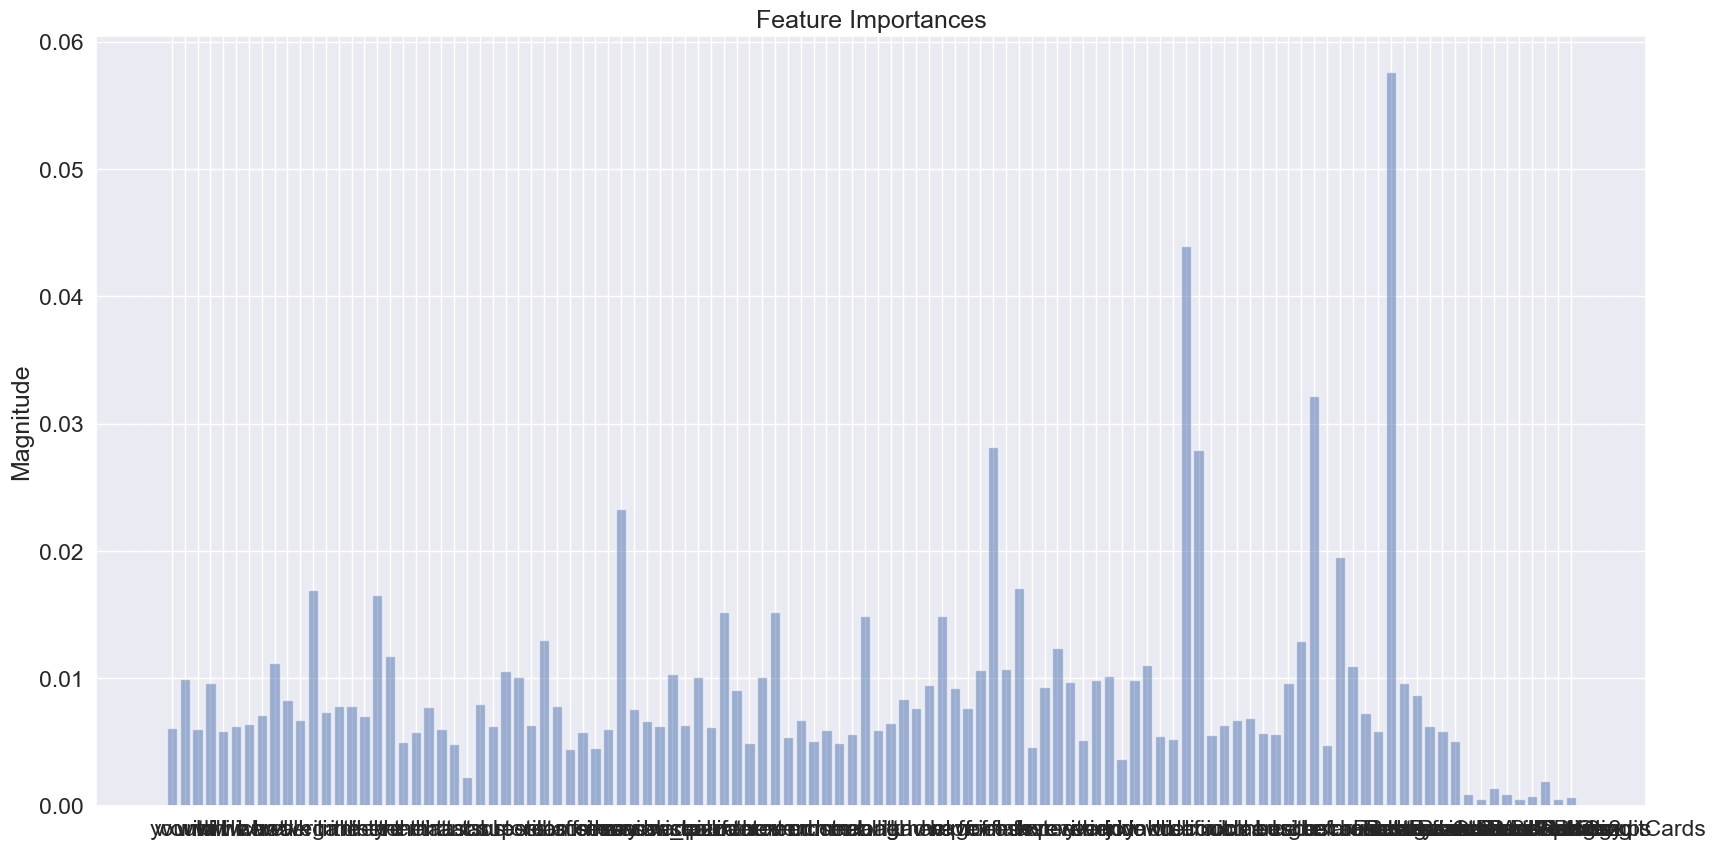

In [353]:
objects = ('review_count','RestaurantsReservations','RestaurantsGoodForGroups','BikeParking','OutdoorSeating','RestaurantsTakeOut','BusinessAcceptsCreditCards','RestaurantsPriceRange2','GoodForKids','RestaurantsDelivery','about', 'after', 'again', 'also', 'alway', 'amaz', 'anoth', 'around',
       'be', 'becaus', 'befor', 'best', 'better', 'burger', 'busi', 'chees',
       'clean', 'come', 'cook', 'could', 'definit', 'delici', 'dish', 'do',
       'down', 'drink', 'drive', 'enjoy', 'even', 'ever', 'everi', 'everyth',
       'experi', 'first', 'flavor', 'fresh', 'friend', 'from', 'go', 'have',
       'help', 'here', 'know', 'leav', 'littl', 'long', 'manag', 'meal',
       'meat', 'more', 'most', 'much', 'need', 'never', 'next', 'other',
       'over', 'perfect', 'pizza', 'realli', 'restaur', 'salad', 'sandwich',
       'sauc', 'say', 'server', 'sinc', 'some', 'someth', 'staff', 'star',
       'still', 'store', 'super', 'sure', 'tabl', 'taco', 'tast', 'than',
       'that', 'their', 'them', 'then', 'there', 'they', 'this', 'time', 'tri',
       'vega', 'veri', 'walk', 'well', 'what', 'when', 'which', 'while',
       'will', 'with', 'would', 'your')
y_pos = np.arange(len(objects))
performance = [0.01034641, 0.00051589, 0.0009456 , 0.00072247, 0.00074524,
       0.00094795, 0.00055678, 0.00142846, 0.0019324 , 0.00053446,
       0.00509985, 0.00590341, 0.00624246, 0.00872453, 0.00962683,
       0.0575896 , 0.00585114, 0.0073137 , 0.01098806, 0.01956113,
       0.00475616, 0.03218096, 0.01290352, 0.00964483, 0.00563233,
       0.00569303, 0.0069152 , 0.00672163, 0.00633698, 0.00552769,
       0.02791293, 0.04393703, 0.00525019, 0.00543552, 0.0110658 ,
       0.00986544, 0.00367596, 0.01018946, 0.00988765, 0.00513897,
       0.00972561, 0.01240375, 0.00935966, 0.00461786, 0.01711876,
       0.01075845, 0.02815079, 0.01067182, 0.00769057, 0.00927613,
       0.01487799, 0.0094588 , 0.00765918, 0.00841064, 0.0065152 ,
       0.00594425, 0.01487546, 0.00561292, 0.00495675, 0.00593164,
       0.00510763, 0.00672273, 0.00540187, 0.01521314, 0.01011845,
       0.00489128, 0.00909125, 0.01525004, 0.00615985, 0.01008497,
       0.00631563, 0.00622087, 0.00663349, 0.00761516, 0.0232905 ,
       0.00605773, 0.00453578, 0.00575078, 0.00445602, 0.00785808,
       0.01302809, 0.00630585, 0.01013069, 0.01057494, 0.006269  ,
       0.00802041, 0.00228915, 0.00482386, 0.00601267, 0.00771917,
       0.00577173, 0.0050385 , 0.01176958, 0.01651344, 0.00708169,
       0.00786546, 0.00781908, 0.00737665, 0.01693987, 0.00671832,
       0.0082664 , 0.01118717, 0.00716085, 0.00644382, 0.00624478,
       0.00585567, 0.00966938, 0.00600824, 0.00995036, 0.00610609]

plt.bar(y_pos, perf2, align='center', alpha=0.5)
plt.xticks(y_pos, objs2)
plt.ylabel('Magnitude')
plt.title('Feature Importances')

plt.show()